In [1]:
import pandas as pd

In [3]:
# Load the newly uploaded dataset
census_data_path = r"C:\Users\suvee\Documents\Intellipat\Python Assignments\Projects\Census income\census-income (7).csv"
census_data = pd.read_csv(census_data_path)

# Display basic information and the first few rows of the dataset
census_data_info = census_data.info()
census_data_head = census_data.head()

census_data_info, census_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(None,
    age          workclass   fnlwgt   education   education-num  \
 0   39          State-gov    77516   Bachelors              13   
 1   50   Self-emp-not-inc    83311   Bachelors              13   
 2   38            Private   215646     HS-grad               9   
 3   53            Private   234721        11th               7   
 4   28            Private   338409   Bachelors              13   
 
         marital-status          occupation    relationship    race      sex  \
 0        Never-married        Adm-clerical   Not-in-family   White     Male   
 1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
 2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
 3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
 4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
 
     capital-gain   capital-loss   hours-per-week  native-country          
 0           2174              

In [5]:
# Renaming the target column for clarity
census_data.rename(columns={census_data.columns[-1]: "income"}, inplace=True)

# Summary statistics for numerical features
numerical_summary = census_data.describe()

# Summary of unique values in categorical features
categorical_columns = census_data.select_dtypes(include=["object"]).columns
categorical_summary = census_data[categorical_columns].nunique()

# Display the summaries
numerical_summary, categorical_summary

(                age        fnlwgt   education-num   capital-gain  \
 count  32561.000000  3.256100e+04    32561.000000   32561.000000   
 mean      38.581647  1.897784e+05       10.080679    1077.648844   
 std       13.640433  1.055500e+05        2.572720    7385.292085   
 min       17.000000  1.228500e+04        1.000000       0.000000   
 25%       28.000000  1.178270e+05        9.000000       0.000000   
 50%       37.000000  1.783560e+05       10.000000       0.000000   
 75%       48.000000  2.370510e+05       12.000000       0.000000   
 max       90.000000  1.484705e+06       16.000000   99999.000000   
 
         capital-loss   hours-per-week  
 count   32561.000000     32561.000000  
 mean       87.303830        40.437456  
 std       402.960219        12.347429  
 min         0.000000         1.000000  
 25%         0.000000        40.000000  
 50%         0.000000        40.000000  
 75%         0.000000        45.000000  
 max      4356.000000        99.000000  ,
  workc

C:\Users\suvee\AppData\Local\Temp\ipykernel_53404\258438489.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=census_data, palette='viridis')


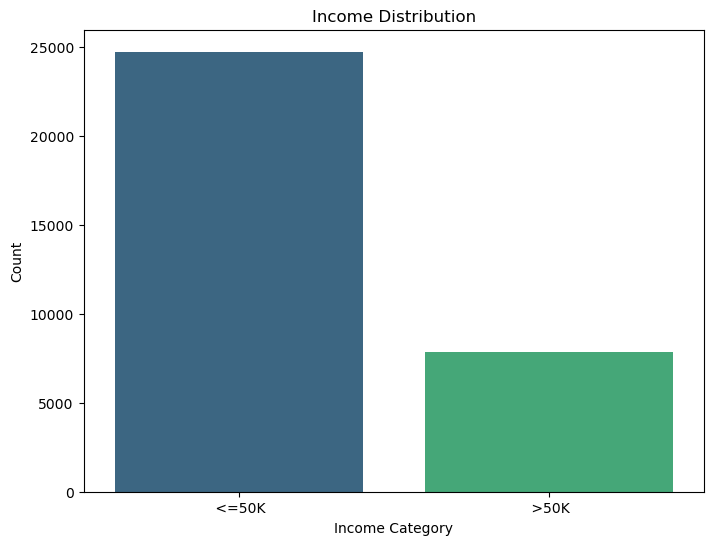

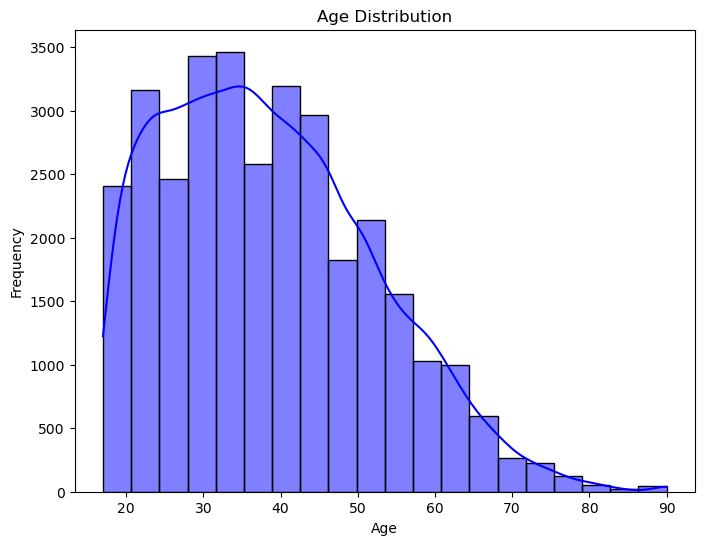

ValueError: Could not interpret value `hours-per-week` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize income distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=census_data, palette='viridis')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

# Visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(census_data['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Hours-per-week by income category
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=census_data, palette='mako')
plt.title('Hours-per-Week by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Hours per Week')
plt.show()

# Workclass distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=' workclass', data=census_data, palette='coolwarm', order=census_data[' workclass'].value_counts().index)
plt.title('Workclass Distribution')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

C:\Users\suvee\AppData\Local\Temp\ipykernel_53404\802280404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=census_data, palette='mako')


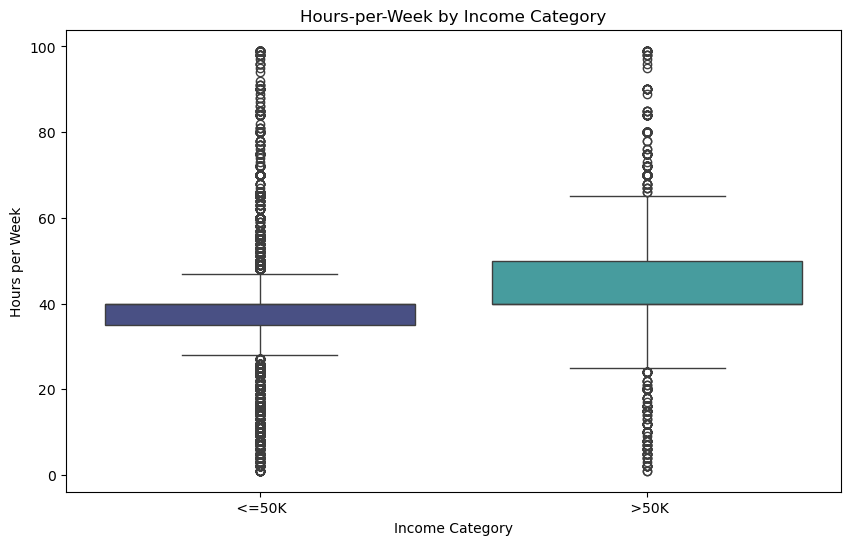

In [9]:
# Clean up column names by stripping leading/trailing whitespace
census_data.columns = census_data.columns.str.strip()

# Retry the visualization for "hours-per-week" by income category
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=census_data, palette='mako')
plt.title('Hours-per-Week by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Hours per Week')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
categorical_features = census_data.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    census_data[col] = le.fit_transform(census_data[col])
    label_encoders[col] = le

# Separate features and target variable
X = census_data.drop(columns=["income"])
y = census_data["income"]

# Split the dataset into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 14), (9769, 14), (22792,), (9769,))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Train and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results for comparison
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.825878   0.706955  0.452463  0.551779
1        Decision Tree  0.813594   0.604228  0.617545  0.610814
2        Random Forest  0.858737   0.737297  0.627053  0.677721
3                  SVM  0.820350   0.798930  0.322818  0.459834
